# Мир Python

## Элементы функционального программирования в Python

Функциональное программирование представляет собой методику написания программного обеспечения, в центре внимания которой находятся функции. Функции могут присваиваться переменным, они могут передаваться в другие функции и порождать новые функции.

Основными предпосылками для наличия функционального программирования в Python являются: функции высших порядков, развитые средства обработки списков, рекурсия, возможность организации ленивых вычислений.

### Чистые функции

*   Легче читать и понимать код
*   Легче тестировать (не надо создавать «условий»)
*   Надежнее, потому что не зависят от «погоды» и состояния окружения, только от аргументов
*   Можно запускать параллельно, можно кешировать результат


In [ ]:
# складываем два числа
def add_numbers(x, y):
    return x + y

# создаем новый список вместо изменения существующего
def add_user(users, new_user):
    return [*users, new_user]

In [ ]:
def outer(x):
    def inner(y):
        return x + y
    return inner

In [ ]:
add_5 = outer(5)
print(add_5(10))

15


### Грязные функции

Если замыкание изменяет замкнутые переменные, функция становится грязной - нарушается требование детерминированности

In [ ]:
def outer():
    count = 0
    def inner():
        nonlocal count
        count += 1
        return count
    return inner

In [ ]:
counter = outer()
print(counter())
print(counter())

1
2


Если замыкание использует изменяемые объекты, функция тоже может быть грязной - возникает побочный эффект

In [ ]:
def outer(lst):
    def inner(item):
        lst.append(item)
        return lst
    return inner

In [ ]:
add_to_list = outer([])
print(add_to_list(1))
print(add_to_list(2))

### Инструментарий для функционального программирования

#### Моржовый оператор `:=`

##### Было

In [ ]:
number = int(input())
print(number, number // 2)

3
3 1


##### Стало!

In [ ]:
print(number := int(input()), number // 2)

4
4 2


##### Было

In [ ]:
while True:
  user_input = input()
  if user_input == 'X':
    break
  print(user_input)

4
4
X


##### Стало!

In [ ]:
while (user_input := input()) != 'X': print(user_input)

4
4
X


##### Забавное

In [ ]:
def function_without_kwargs(*args):
  ...

In [ ]:
function_without_kwargs(name := 'Alex', age := 22)

#### Моржовый оператор `:=` в генераторных выражениях

##### Было

In [ ]:
def string_to_number(string: str) -> int:
  return int(string)

[
  string_to_number(string)
  for string in input().split()
  if string_to_number(string) > 0
]

4


[4]

##### Стало?

In [ ]:
def string_to_number(string: str) -> int:
  return int(string)

[
  numberr := string_to_number(string)
  for string in input().split()
  if numberr > 0
]

4


NameError: name 'numberr' is not defined

##### Стало!

In [ ]:
def string_to_number(string: str) -> int:
  return int(string)

[
  numberr
  for string in input().split()
  if (numberr := string_to_number(string)) > 0
]

4


[4]

#### Встроенные функции высших порядков

In [ ]:
# map()
lst = list(map(lambda x: x**2, [1, 2, 3, 4, 5]))

print(lst)

In [ ]:
# filter()
lst = list(filter(lambda x: x % 2 == 0, [11, 22, 33, 44, 55, 66]))

print(lst)

In [ ]:
# zip()
word_list = ['Elf', 'Dwarf', 'Human']
digit_tuple = (3, 7, 9, 1)
ring_list = ['ring', 'ring', 'ring', 'ring', 'ring']

lst = list(zip(word_list, digit_tuple, ring_list))

print(lst)

#### Модуль functools

In [ ]:
from functools import reduce, cmp_to_key, lru_cache

In [ ]:
# посчитаем сумму элементов списка
result = reduce(lambda sum, x: sum + x, [0.1, 0.3, 0.6])

print(result)

In [ ]:
# посчитаем с reduce количество вхождений строки в список
uncle_ben = ['С большой силой', 'приходит', 'большая ответственность']
complete = reduce(lambda a, x: a + x.count('ответственность'), uncle_ben, 0)

print(complete)

In [ ]:
# сортировка по убыванию
def num_compare(x, y):
    return y - x

print(sorted([4, 43, 1, 22], key=cmp_to_key(num_compare)))

In [ ]:
# функция ищет "энтое" число Фибоначчи
@lru_cache(maxsize=None)
def fib_rec(n):
    if n < 2:
        return n
    return fib_rec(n - 1) + fib_rec(n - 2)

print(fib_rec(100))
print(fib_rec.cache_info())

#### Модуль itertools

In [ ]:
from itertools import islice, count, cycle, count, zip_longest, accumulate, starmap, compress

In [ ]:
# Бесконечный счётчик
cnt = count(start=2024, step=4)
next(cnt)
next(cnt)

2028

In [ ]:
# Пример использования итератора в zip-функции
days = [366]*4
list(zip(itertools.count(2020, 4), days))

In [ ]:
# Если последовательности имеют неодинаковую длину, zip() ограничивается самой короткой
list(zip(range(0, 10), range(0, 5)))

In [ ]:
# Упаковка по более длинной последовательности
for (i, j) in zip_longest(range(0, 10), range(0, 5)): print(i, j)

In [ ]:
# Аккумулирующий итератор
list(accumulate(range(1, 10)))

[1, 3, 6, 10, 15, 21, 28, 36, 45]

In [ ]:
# Мапирование с распаковкой
# Этот метод принимает функцию и список кортежей аргументов

squares = starmap(pow, [(0, 2), (1, 2), (2, 2)])
list(squares)

[0, 1, 4]

In [ ]:
# Фильтрация группы элементов
numbers = [0, 1, 2, 3, 2, 1, 0]
selectors = [True, True, False, True]
list(compress(numbers, selectors))

## Однострочники

### Очень простой пример

In [ ]:
def fib(x):
    if x <= 2:
        return 1
    return fib(x - 1) + fib(x - 2)

#### Однострочник

In [ ]:
fib = lambda x: x if x<=1 else fib(x-1) + fib(x-2)

### Простой пример

In [ ]:
array = [29,99,27,41,66,28,44,78,87,19,31,76,58,88,83,97,12,21,44]

In [ ]:
def partition(array, start, end):
    pivot = array[start]
    low = start + 1
    high = end
    while True:
        while low <= high and array[high] >= pivot:
            high = high - 1
        while low <= high and array[low] <= pivot:
            low = low + 1
        if low <= high:
            array[low], array[high] = array[high], array[low]
        else:
            break
    array[start], array[high] = array[high], array[start]
    return high

def quick_sort(array, start, end):
    if start >= end:
        return
    p = partition(array, start, end)
    quick_sort(array, start, p-1)
    quick_sort(array, p+1, end)

In [ ]:
quick_sort(array, 0, len(array) - 1)
print(array)

#### Однострочник

In [ ]:
array = [29,99,27,41,66,28,44,78,87,19,31,76,58,88,83,97,12,21,44]

In [ ]:
q = lambda l: q([x for x in l[1:] if x <= l[0]]) + [l[0]] + q([x for x in l if x > l[0]]) if l else []

In [ ]:
print(q(array))

## Нововведения в Python 3.12

In [ ]:
!python --version

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.13

In [ ]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.13 1

In [ ]:
!python --version

## Интерактивный REPL

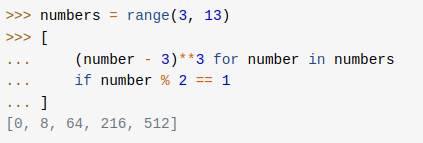

 ## Информативные сообщения об ошибках

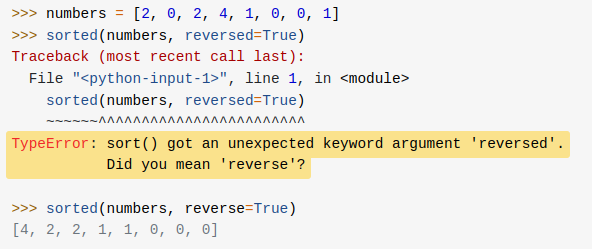

### Удаление глобальной блокировки интерпретатора (GIL)

```
$ CODE='import pyfeatures; print(pyfeatures.FreeThreading())'

$ python3.13 -c "$CODE"
Free Threading: unsupported

$ python3.13t -c "$CODE"
Free Threading: enabled ✨

$ python3.13t -X gil=1 -c "$CODE"
Free Threading: disabled
```

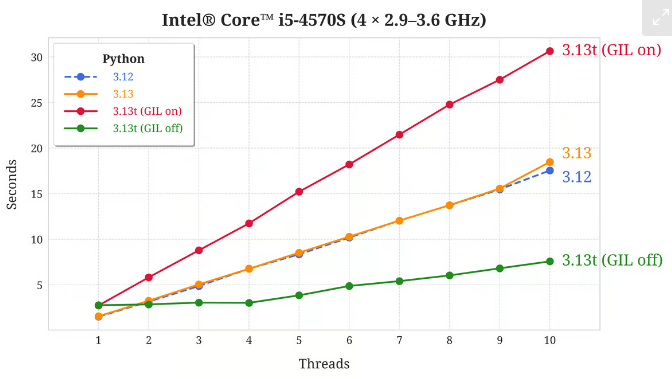

### Экспериментальный компилятор JIT

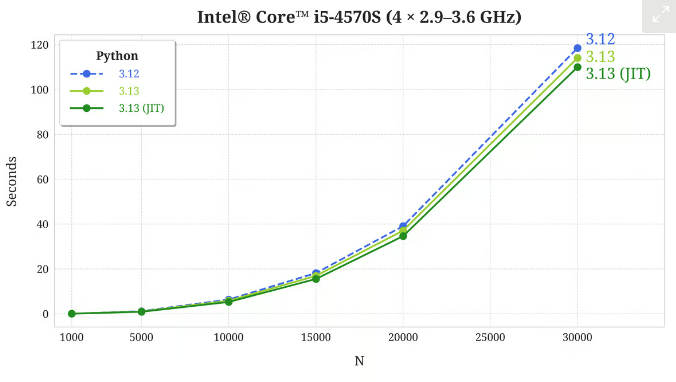

### Улучшения в статической типизации

In [ ]:
from typing import TypeIs

type Tree = list[Tree | int]

def is_tree(obj: object) -> TypeIs[Tree]:
    return isinstance(obj, list) and all(
        is_tree(elem) or isinstance(elem, int) for elem in obj
    )

def get_left_leaf_value(tree_or_leaf: Tree | int) -> int:
    if is_tree(tree_or_leaf):
        return get_left_leaf_value(tree_or_leaf[0])
    else:
        return tree_or_leaf